# *Linear Regression*
Linear regression is a fundamental and widely-used statistical technique that aims to establish a relationship between two or more variables. It seeks to model the linear association between a dependent variable and one or more independent variables, enabling predictions and understanding of the underlying data patterns.

In [251]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
data = pd.read_csv("clean_weather.csv",index_col=0)
data = data.ffill()
data.head(5)

,tmax,tmin,rain,tmax_tomorrow
1970-01-01,60.0,35.0,0.0,52.0
1970-01-02,52.0,39.0,0.0,52.0
1970-01-03,52.0,35.0,0.0,53.0
1970-01-04,53.0,36.0,0.0,52.0
1970-01-05,52.0,35.0,0.0,50.0


<Axes: xlabel='tmax', ylabel='tmax_tomorrow'>

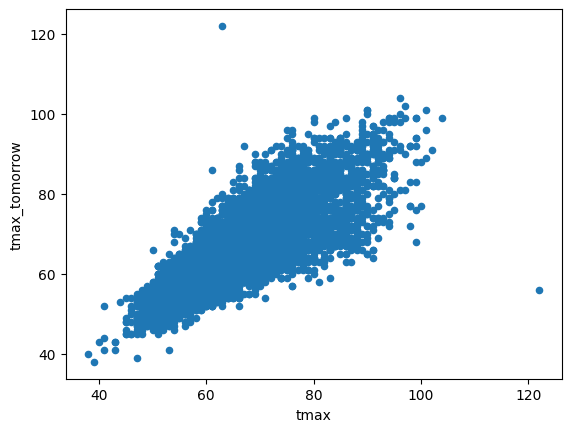

In [252]:
data.plot.scatter("tmax","tmax_tomorrow")

# *Gradient Descent*
Gradient descent is an optimization algorithm commonly used in machine learning and mathematical optimization to find the minimum of a function.

The core idea behind gradient descent is to iteratively update the parameters of a model by taking steps proportional to the negative gradient of the loss function with respect to those parameters. The negative gradient points in the direction of steepest descent, allowing the algorithm to move towards the minimum of the loss function.

The algorithm starts with an initial set of parameter values and computes the gradient of the loss function at that point. It then adjusts the parameters by subtracting a fraction of the gradient, known as the learning rate, multiplied by the gradient itself. This process is repeated iteratively until convergence or a stopping criterion is met.
                           
<img src="./Image.png" align="center"/>


In [253]:
PREDICTORS = ["tmax"]
TARGET = "tmax_tomorrow"
np.random.seed(0)
split_data = np.split(data,[int(.7*len(data)),int(.85*len(data))])
(train_x,train_y),(valid_x,valid_y),(test_x,test_y) = [[d[PREDICTORS].to_numpy(),d[[TARGET]].to_numpy()] for d in split_data]

In [254]:
import math
def init_params(predictors):
    np.random.seed(0)
    weight = np.random.rand(predictors,1)
    biases = np.ones((1,1))
    return [weight,biases]

In [255]:
def forward(params,x):
    weights, biases = params
    prediction = x @ weights +biases
    return prediction

In [256]:
def mse(actual, predicted):
    return np.mean((actual-predicted)**2)

def mse_grad(actual, predicted):
    return predicted - actual

In [257]:
def backward(params,x,lr,grad):
    w_grad = (x.T/x.shape[0])@grad
    b_grad = np.mean(grad,axis = 0)

    params[0] -= w_grad*lr
    params[1] -= b_grad*lr

    return params

In [258]:
lr = 1e-5
epochs = 1000
params = init_params(train_x.shape[1])

for i in range(epochs):
    predictions = forward(params,train_x)
    grad = mse_grad(train_y,predictions)
    params = backward(params,train_x,lr,grad)
    if i%10==0:
        predictions = forward(params,valid_x)
        valid_loss = mse(valid_y,predictions)
        #print(f"Epoch {i} loss: {valid_loss}")


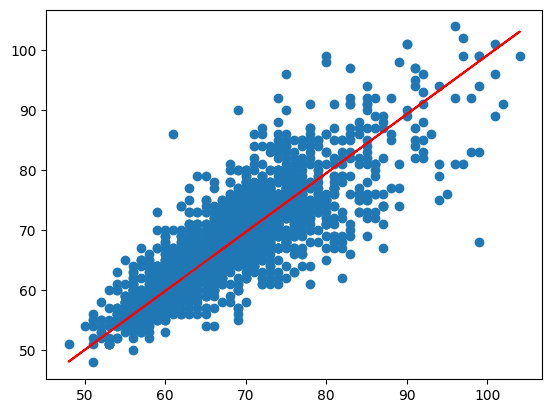

 Mean Squared Error: 24.391622669715797


In [259]:
predictions = forward(params,test_x)
plt.scatter(test_x,test_y)
plt.plot(test_x,predictions,'red')
plt.show()
print(f" Mean Squared Error: {mse(test_y,predictions)}")

#### Linear Regression using scikit-learn

Weight: [[0.82333886]]
Bias: [12.07925402]
Mean Squared Error: 24.764676862358165


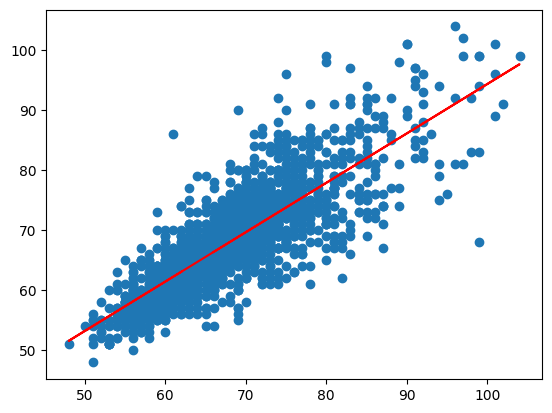

In [260]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
lr=  LinearRegression()
lr.fit(test_x,test_y)
plt.scatter(test_x,test_y)
plt.plot(test_x,lr.predict(test_x),'red')
print(f"Weight: {lr.coef_}")
print(f"Bias: {lr.intercept_}")
print(f"Mean Squared Error: {mean_squared_error(test_x,test_y)}")